In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics.cluster import adjusted_rand_score 
import scipy.cluster.hierarchy as shc 
from sklearn.decomposition import PCA 

In [2]:
data = pd.read_csv('customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.drop('Region',inplace=True,axis=1)
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Channel             100 non-null int64
Fresh               100 non-null int64
Milk                100 non-null int64
Grocery             100 non-null int64
Frozen              100 non-null int64
Detergents_Paper    100 non-null int64
Delicassen          100 non-null int64
dtypes: int64(7)
memory usage: 5.6 KB


In [5]:
data_scaled = StandardScaler().fit_transform(data)
data_normal = normalize(data_scaled)
data_normal = pd.DataFrame(data_normal)
data_normal

,0,1,2,3,4,5,6
0,0.778980,-0.020620,0.093774,-0.216983,-0.499929,-0.223357,-0.192545
1,0.834430,-0.451789,0.112090,-0.102497,-0.216871,-0.156254,-0.071382
2,0.404459,-0.245116,0.017620,-0.108802,-0.040965,-0.061244,0.871065
3,-0.617873,0.016095,-0.368426,-0.306665,0.504877,-0.362147,-0.046265
4,0.528292,0.468165,-0.139598,-0.162034,0.143279,-0.227628,0.619389
...,...,...,...,...,...,...,...
95,-0.541166,-0.593809,-0.244675,-0.189878,-0.292741,-0.339986,-0.239422
96,0.526224,-0.624566,-0.272237,-0.123838,-0.346674,-0.049409,-0.347752
97,-0.485744,-0.516539,-0.327901,-0.366705,-0.225817,-0.317344,-0.321790
98,-0.490137,-0.517058,-0.336686,-0.364124,-0.214354,-0.320068,-0.313180


In [6]:
# pca = PCA(n_components = 3) 
pca = PCA(n_components = 2) 
data_principal = pca.fit_transform(data_normal) 
data_principal = pd.DataFrame(data_principal) 
# data_principal.columns = ['P1', 'P2', 'P3'] 
data_principal.columns = ['P1', 'P2']

In [58]:
dbscan = DBSCAN(eps=0.05, min_samples = )
clusters = dbscan.fit_predict(data_principal)

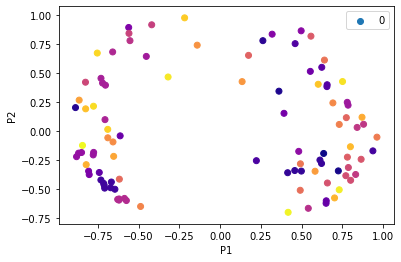

In [59]:
# plot the cluster assignments
plt.scatter(data_principal['P1'], data_principal['P2'], c=clusters, cmap="plasma")
plt.xlabel("P1")
plt.ylabel("P2")
plt.legend(list(range(len(np.unique(clusters)))))

In [52]:
list(range(len(np.unique(clusters))))

[0, 1]